# Implementing Feature Selection

* Focus on determining what features contribute the most to the predition value

In [12]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [23]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [13]:
x_data = np.load('./data/cleaned_data_np.npy')
y_data = pd.read_csv('./data/target_features.csv', header=None)

In [17]:
#feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(x_data, y_data.values.ravel())

/home/dbutler/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [3] are constant.
  UserWarning)
/home/dbutler/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [18]:
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(x_data)
print(features[0:5, :])

[  7.722e+00   6.667e+01   3.171e+01         nan   1.338e+02   3.202e+02
   3.921e+02   5.874e+00   1.185e+01   2.260e-01   1.579e+02   1.163e+02
   7.187e+00   1.007e+02   2.760e+01   2.250e+01   3.992e-02   4.995e-01
   3.181e-03   2.951e-01   9.785e+01   1.074e+02   4.430e+01   2.712e+01
   1.105e+02   1.576e+00   1.607e+01   1.607e+01   4.531e+02   4.531e+02
   1.071e+02   1.071e+02   4.705e+02   3.284e-01   5.391e+02   9.411e+01
   2.974e+00   1.592e+02   4.328e+01   5.221e+00   2.571e+01   2.896e+00
   4.564e+02   2.450e+02   1.249e+01   3.822e+02   4.010e+02   1.787e+00
   3.727e+01   2.739e+03   7.718e+02]
[[0 1 0 1]
 [0 1 0 1]
 [0 1 0 1]
 [0 1 0 1]
 [0 1 0 1]]


## Combining SelectKBest with GridSearch

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = cross_validation.train_test_split(x_data, y_data, test_size=0.2, random_state=0)

kbest = SelectKBest(f_classif)
pipeline = Pipeline([('kbest', kbest), ('lr', LogisticRegression())])
grid_search = GridSearchCV(pipeline, {'kbest__k': [1,2,3,4], 'lr__C': np.logspace(-10, 10, 5)})
grid_search.fit(x_train, y_train.values.ravel())

#generate testset predictions
predictions = grid_search.predict(x_test)

#output the accuracy
print('Accuracy = ' + str(accuracy_score(y_test, predictions, normalize=True)))
confusionMatrix = confusion_matrix(y_test, predictions)
print(confusionMatrix)


/home/dbutler/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [3] are constant.
  UserWarning)
/home/dbutler/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [3] are constant.
  UserWarning)
/home/dbutler/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [3] are constant.
  UserWarning)
/home/dbutler/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [3] are constant.
  UserWarning)
/home/dbutler/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [3] are constant.
  UserWarning)
/home/dbutler/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [3] are constant.
  UserWarning)
/home/dbutler/anaconda3/lib/

/home/dbutler/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [3] are constant.
  UserWarning)
/home/dbutler/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [3] are constant.
  UserWarning)
/home/dbutler/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [3] are constant.
  UserWarning)
/home/dbutler/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [3] are constant.
  UserWarning)
/home/dbutler/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [3] are constant.
  UserWarning)
/home/dbutler/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [3] are constant.
  UserWarning)
/home/dbutler/anaconda3/lib/

Accuracy= 0.899465460526
[[4262   62]
 [ 427  113]]


# KNN - Cross validation Multiple Values of K

In [33]:
from sklearn import model_selection

In [44]:
#create odd list of k for KNN
alist = list(range(1, 50))
#Subsetting only odd
neighbors = list(filter(lambda x: x % 2 != 0, alist))
#hold the cross val scores
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = model_selection.cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 41


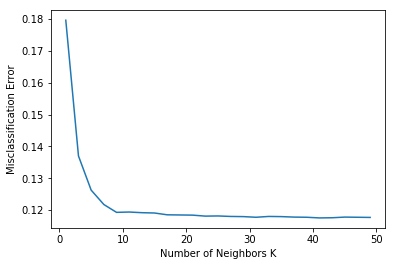

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

MSE = [1 - x for x in cv_scores]

optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# Getting accuracy using optimal number

In [47]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train.values.ravel())
pred = knn.predict(x_test)
print(accuracy_score(y_test, pred))

0.886307565789
